### Importing packages

In [38]:
import tensorflow as tf
from tensorflow import keras        # keras is a dataset
import matplotlib.pyplot as plt
import numpy as np

In [39]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [40]:
print(len(X_train))
print(len(X_test))
X_train[0].shape

60000
10000


(28, 28)

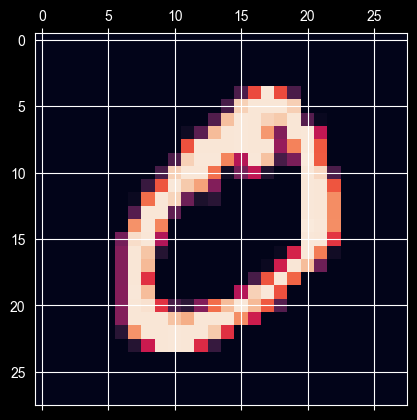

In [41]:
plt.matshow(X_train[1])

### ^ Hand Written Numbers

### Preprocessing (making all the dataset values in the 0 – 1 range) without using the MinMax pre-processing technique.

As using the basix mathematics as the pixel values range between 0 – 255. and dividing any number between the range with 255 will answer in the 0 to 1 range.

In [42]:
X_train = X_train / 255
X_test = X_test / 255

### Flatting the 2D image in to the 1D on every(60,000 train, 10,000 test) images.

* each image contains 28*28 pixels structure, which means 784 pixels.
* so create a 784-size array for each image


In [43]:
input_array_size = pow((X_train[0].shape[0]), 2)
X_train_flattened = X_train.reshape(len(X_train), input_array_size)
X_test_flattened = X_test.reshape(len(X_test), input_array_size)

## Understanding the Keras API Calls

### 1. Creating the Model — `keras.Sequential`

```python
model1 = keras.Sequential([
    keras.layers.Dense(10, input_dim=input_array_size, activation='sigmoid'),
])
```

| Parameter | Meaning                                    | Notes |
|-----------|--------------------------------------------|-------|
| keras.Sequential | Container stacking layers sequentially     | Feed‑forward only |
| Dense(10) | Fully connected layer with 10 output units | For digits 0‑9 |
| input_dim | Input feature size                         | 28×28 = 784 |
| activation | Activation function                        | sigmoid, relu, softmax |

**Result:** maps a 784‑D input vector to 10 outputs.

---

### 2. Compiling the Model — `model.compile`

```python
model1.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
```

| Parameter | Purpose | Alternatives |
|-----------|----------|-------------|
| optimizer | Weight update algorithm | adam, rmsprop |
| loss | Training objective | categorical_crossentropy |
| metrics | Monitoring metric | precision, AUC |

**Why sparse?** Labels are integers, not one‑hot encoded.

---

### 3. Training the Model — `model.fit`

```python
model1.fit(X_train_flattened, y_train, epochs=5)
```

| Parameter | Description |
|-----------|-------------|
| X_train_flattened | Feature matrix |
| y_train | Integer class labels |
| epochs | Number of full passes |
| batch_size | Defaults to 32 |
| validation_data | Optional validation set |

**Training steps:** forward pass → loss → backprop → update weights.

---



In [44]:
model1 = keras.Sequential([
    keras.layers.Dense(
        10, input_dim=input_array_size, activation='sigmoid'        # output layer
    ),
])

model1.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model1.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 811us/step - accuracy: 0.8119 - loss: 0.7784
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 792us/step - accuracy: 0.8801 - loss: 0.4571
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - accuracy: 0.8913 - loss: 0.4037
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.8972 - loss: 0.3771
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 943us/step - accuracy: 0.9008 - loss: 0.3603


## Calculate the model accuracy score

In [45]:
model1.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - accuracy: 0.9097 - loss: 0.3365


[0.33646446466445923, 0.9096999764442444]

## Predict result in the X_test dataset's first value

In [46]:
predicted = model1.predict(X_test_flattened)
predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 602us/step


array([0.45453885, 0.00610105, 0.4843682 , 0.9181707 , 0.16452576,
       0.30907443, 0.01477653, 0.99980617, 0.4251163 , 0.92071795],
      dtype=float32)

#### In the above result, we have the max value is 0.9997105 that is associated with the 7'th position/number.

7


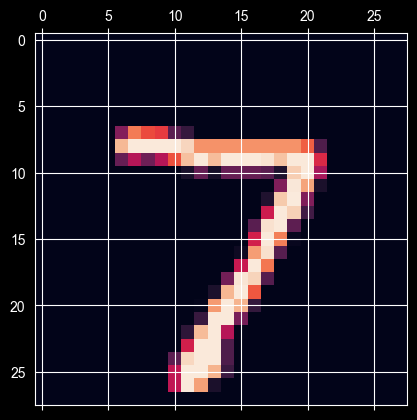

In [47]:
print(np.argmax(predicted[0]))          # returns the position of the max value in the array --> 7
plt.matshow(X_test[0])

## Lets try to add a hidden layer to see is accuracy increase?

In [48]:
model2 = keras.Sequential([
    keras.layers.Dense(10, input_dim=input_array_size, activation='relu'),     # hidden layer
    keras.layers.Dense(10, input_dim=input_array_size, activation='sigmoid')    # Output Layer
])

model2.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model2.fit(X_train_flattened, y_train, epochs=5)
print(f"\n")
model2.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 791us/step - accuracy: 0.7181 - loss: 0.9538
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - accuracy: 0.8650 - loss: 0.4686
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - accuracy: 0.8841 - loss: 0.4054
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 789us/step - accuracy: 0.8940 - loss: 0.3724
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - accuracy: 0.9011 - loss: 0.3489


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.9053 - loss: 0.3263


[0.32634103298187256, 0.9053000211715698]

### Yes! The score is increasing when added a hidden layer.

### but the score can be more increase if we added more hidden layers?

In [49]:
model3 = keras.Sequential([
    keras.layers.Dense(10, input_dim=input_array_size, activation='relu'),     # hidden layer _1
    keras.layers.Dense(10, input_dim=input_array_size, activation='relu'),     # hidden layer _2
    keras.layers.Dense(10, input_dim=input_array_size, activation='relu'),     # hidden layer _3
    keras.layers.Dense(10, input_dim=input_array_size, activation='sigmoid')    # Output Layer
])

model3.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model3.fit(X_train_flattened, y_train, epochs=5)
print(f"\n")
model3.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 835us/step - accuracy: 0.4845 - loss: 1.5356
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.8325 - loss: 0.5744
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - accuracy: 0.8889 - loss: 0.3877
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.9025 - loss: 0.3394
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 790us/step - accuracy: 0.9113 - loss: 0.3119


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.9173 - loss: 0.2930


[0.29302161931991577, 0.9172999858856201]

### Increased but in very less measure

### Let's try adding more

In [50]:
model4 = keras.Sequential([
    keras.layers.Dense(10, input_dim=input_array_size, activation='relu'),     # hidden layer _1
    keras.layers.Dense(10, input_dim=input_array_size, activation='relu'),     # hidden layer _2
    keras.layers.Dense(10, input_dim=input_array_size, activation='relu'),     # hidden layer _3
    keras.layers.Dense(10, input_dim=input_array_size, activation='relu'),     # hidden layer _4
    keras.layers.Dense(10, input_dim=input_array_size, activation='relu'),     # hidden layer _5
    keras.layers.Dense(10, input_dim=input_array_size, activation='relu'),     # hidden layer _6
    keras.layers.Dense(10, input_dim=input_array_size, activation='relu'),     # hidden layer _7
    keras.layers.Dense(10, input_dim=input_array_size, activation='sigmoid')    # Output Layer
])

model4.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model4.fit(X_train_flattened, y_train, epochs=5)
print(f"\n")
model4.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 829us/step - accuracy: 0.3580 - loss: 1.8479
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 972us/step - accuracy: 0.7887 - loss: 0.7021
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.8679 - loss: 0.4514
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 787us/step - accuracy: 0.8879 - loss: 0.3842
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 853us/step - accuracy: 0.9021 - loss: 0.3391


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.8905 - loss: 0.3675


[0.36746087670326233, 0.890500009059906]

### NO! the score is falling now because it moved forward from the Global Minima.

### But it can be increased if we increse the neurons in the hidden layer?

In [51]:
model5 = keras.Sequential([
    keras.layers.Dense(100, input_dim=input_array_size, activation='relu'),     # hidden layer
    keras.layers.Dense(10, input_dim=input_array_size, activation='sigmoid')    # Output Layer
])

model5.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model5.fit(X_train_flattened, y_train, epochs=5)
print(f"\n")
(model2.evaluate(X_test_flattened, y_test),
 model5.evaluate(X_test_flattened, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - accuracy: 0.8313 - loss: 0.6632
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9042 - loss: 0.3414
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 924us/step - accuracy: 0.9173 - loss: 0.2934
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.9258 - loss: 0.2628
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 872us/step - accuracy: 0.9321 - loss: 0.2396


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - accuracy: 0.9053 - loss: 0.3263
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9375 - loss: 0.2238


([0.32634103298187256, 0.9053000211715698], [0.22383618354797363, 0.9375])

### Yes score has increased, lets increse the count of neurons

In [52]:
model6 = keras.Sequential([
    keras.layers.Dense(1000, input_dim=input_array_size, activation='relu'),     # hidden layer
    keras.layers.Dense(10, input_dim=input_array_size, activation='sigmoid')    # Output Layer
])

model6.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model6.fit(X_train_flattened, y_train, epochs=5)
print(f"\n")
model6.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.5836
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9121 - loss: 0.3165
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9257 - loss: 0.2694
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9338 - loss: 0.2393
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9410 - loss: 0.2161


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9447 - loss: 0.2018


[0.20177504420280457, 0.9447000026702881]

### Score Increased! add more neurons

In [53]:
model7 = keras.Sequential([
    keras.layers.Dense(2000, input_dim=input_array_size, activation='relu'),     # hidden layer
    keras.layers.Dense(10, input_dim=input_array_size, activation='sigmoid')    # Output Layer
])

model7.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model7.fit(X_train_flattened, y_train, epochs=5)
print(f"\n")
model7.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8649 - loss: 0.5719
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9145 - loss: 0.3103
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9261 - loss: 0.2641
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9355 - loss: 0.2342
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9416 - loss: 0.2116


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9439 - loss: 0.1981


[0.1980520784854889, 0.9438999891281128]

### Yes score increases when we add more neurons in a layer at a specific range as of now the score is just slightly increase also if we double the neurons compare to the previous count.

### what will happen if we add more neurons and layers?

In [54]:
model8 = keras.Sequential([
    keras.layers.Dense(100, input_dim=input_array_size, activation='relu'),     # hidden layer _1
    keras.layers.Dense(1000, input_dim=input_array_size, activation='relu'),     # hidden layer _2
    keras.layers.Dense(2000, input_dim=input_array_size, activation='relu'),     # hidden layer _3
    keras.layers.Dense(10, input_dim=input_array_size, activation='sigmoid')    # Output Layer
])

model8.compile(
    optimizer="sgd",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model8.fit(X_train_flattened, y_train, epochs=5)
print(f"\n")
model8.evaluate(X_test_flattened, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8110 - loss: 0.7299
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9148 - loss: 0.2937
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9307 - loss: 0.2367
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9428 - loss: 0.1975
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9508 - loss: 0.1693


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9528 - loss: 0.1570


[0.15700317919254303, 0.9527999758720398]

### Yes with this combo the score has increased.

### But what if we use the better optimizers

In [55]:
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam

model9 = keras.Sequential([
    keras.layers.Dense(100, input_dim=input_array_size, activation='relu'),     # hidden layer
    keras.layers.Dense(10, input_dim=input_array_size, activation='sigmoid')    # Output Layer
])

print("\n\nSGD:")
model9.compile(
    optimizer=SGD(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model9.fit(X_train_flattened, y_train, epochs=5)
print(f"\n")
model9.evaluate(X_test_flattened, y_test)

print("\n\nAdagrad:")
model9.compile(
    optimizer=Adagrad(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model9.fit(X_train_flattened, y_train, epochs=5)
print(f"\n")
model9.evaluate(X_test_flattened, y_test)

print("\n\nRMSprop:")
model9.compile(
    optimizer=RMSprop(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model9.fit(X_train_flattened, y_train, epochs=5)
print(f"\n")
model9.evaluate(X_test_flattened, y_test)

print("\n\nAdam:")
model9.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model9.fit(X_train_flattened, y_train, epochs=5)
print(f"\n")
model9.evaluate(X_test_flattened, y_test)



SGD:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 809us/step - accuracy: 0.8376 - loss: 0.6433
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 881us/step - accuracy: 0.9043 - loss: 0.3402
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 879us/step - accuracy: 0.9175 - loss: 0.2942
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9260 - loss: 0.2648
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 900us/step - accuracy: 0.9329 - loss: 0.2413


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9365 - loss: 0.2253


Adagrad:
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 959us/step - accuracy: 0.9368 - loss: 0.2255
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 956us/step - accuracy: 0.9387 - loss: 0.2208
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 927us/step - accuracy: 0.9394 - loss: 0.2172
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step - accuracy: 0.9406 - loss: 0.2140
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 955us/step - accuracy: 0.9415 - loss: 0.2113


313/313 ━━━━━━━

[0.18232649564743042, 0.9614999890327454]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 547us/step


(array([3.77718065e-11, 6.48039631e-08, 9.99987066e-01, 1.00405996e-04,
        1.55490604e-28, 5.25807869e-03, 5.28454450e-13, 8.64073882e-05,
        3.36505281e-07, 7.98458276e-27], dtype=float32),
 np.int64(2),
 <matplotlib.image.AxesImage at 0x20761b61d10>)

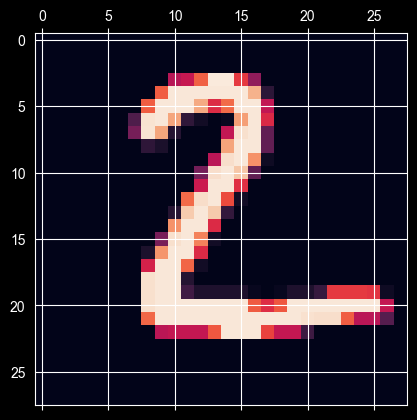

In [56]:
predicted = model9.predict(X_test_flattened)
(predicted[1], np.argmax(predicted[1]), plt.matshow(X_test[1]))